# Metrics for goodness of trees -- Local posterior probability from ASTRAL-pro and Taxonomic accuracy

In [1]:
import sys
import re
import pandas as pd
import numpy as np
from skbio.tree import TreeNode
import seaborn as sns
import matplotlib.pyplot as plt
import upsetplot
import matplotlib.colors as mcolors

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams.update({
    'figure.autolayout': True,
    'savefig.bbox': 'tight',
    'svg.fonttype': 'none',
    'font.sans-serif': 'Arial',
    'font.size': 12,
    'boxplot.medianprops.linewidth': 2,
    'boxplot.flierprops.markeredgecolor': 'none',
    'boxplot.flierprops.markersize': 5})

In [4]:
def get_cmap_colors(cmap_name, n):
    cmap = plt.get_cmap(cmap_name)
    colors = [cmap(i) for i in np.linspace(0, 1, n)]
    return colors

Genomes

In [5]:
genomes = np.loadtxt(f'./input_data/genomes_sampled_family_10.txt', dtype = str)

Astral-pro version

In [6]:
version = 2

### 41 SCG from Martinez-Gutierrez

In [7]:
dataPathIn = f'./input_data/wol2/martinez_gutierrez/wol2'

In [8]:
tree_martinez = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
tree_martinez

<TreeNode, name: N1, internal node count: 1508, tips count: 1510>

In [9]:
df_martinez = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
df_martinez.shape

(1508, 9)

### 57 SCG from Moody 2024

In [10]:
dataPathIn = f'./input_data/wol2/moody/wol2'

In [11]:
tree_moody = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
tree_moody

<TreeNode, name: N1, internal node count: 1508, tips count: 1510>

In [12]:
df_moody = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
df_moody.shape

(1508, 9)

### 400 SCG from Phylophlan3

In [13]:
dataPathIn = f'./input_data/wol2/phylophlan/wol2_min_marker_genes_per_genome_1'
tree_phylophlan_no_min = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
tree_phylophlan_no_min

<TreeNode, name: N1, internal node count: 1508, tips count: 1510>

In [14]:
df_phylophlan_no_min = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
df_phylophlan_no_min.shape

(1508, 9)

### 136 SCG from Amphora2

In [15]:
dataPathIn = f'./input_data/wol2/amphora2/wol2_min_marker_genes_per_genome_1'
tree_amphora_no_min = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
tree_amphora_no_min

<TreeNode, name: N1, internal node count: 1508, tips count: 1510>

In [16]:
df_amphora_no_min = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
df_amphora_no_min.shape

(1508, 9)

### Marker genes selected with our approach--KEGG

In [17]:
ks = [10, 50, 100, 200, 400, 600, 800, 1000]
ps = [0]
matrix = 'presence_absence_copies'
threshold = 1.0

In [18]:
%%time
trees_kegg_min = {}
metadata_kegg_min = {}
for k in ks:
    for p in ps:
        combination = f'k_{k}_p_{p}/{matrix}' 
        dataPathIn = f'./input_data/wol2/kegg/bit_score_threshold_{threshold}/min_marker_genes_per_genome/{combination}'
        try:
            metadata_kegg_min[f'k_{k}_p_{p}_{matrix}'] = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
            trees_kegg_min[f'k_{k}_p_{p}_{matrix}'] = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
        except:
            print(f'\tCannot be loaded. Error in outgroup')

CPU times: user 10.4 s, sys: 76.5 ms, total: 10.5 s
Wall time: 10.6 s


In [19]:
%%time
trees_kegg_no_min = {}
metadata_kegg_no_min = {}
for k in ks:
    for p in ps:
        combination = f'k_{k}_p_{p}/{matrix}' 
        dataPathIn = f'./input_data/wol2/kegg/bit_score_threshold_{threshold}/no_min_marker_genes_per_genome/{combination}'
        try:
            metadata_kegg_no_min[f'k_{k}_p_{p}_{matrix}'] = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
            trees_kegg_no_min[f'k_{k}_p_{p}_{matrix}'] = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
        except:
            print(f'\tCannot be loaded. Error in outgroup')

CPU times: user 10.5 s, sys: 55.4 ms, total: 10.5 s
Wall time: 10.7 s


### Marker genes selected with our approach--EggNog

In [20]:
ks = [10, 50, 100, 200, 400, 600, 800, 1000]
ps = [0]
matrix = 'presence_absence_copies'
threshold = 1.0

In [21]:
%%time
trees_eggnog_min = {}
metadata_eggnog_min = {}
for k in ks:
    for p in ps:
        combination = f'k_{k}_p_{p}/{matrix}' 
        dataPathIn = f'./input_data/wol2/eggnog/bit_score_threshold_{threshold}/min_marker_genes_per_genome/{combination}'
        try:
            metadata_eggnog_min[f'k_{k}_p_{p}_{matrix}'] = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
            trees_eggnog_min[f'k_{k}_p_{p}_{matrix}'] = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
        except:
            print(f'\tCannot be loaded. Error in outgroup')

CPU times: user 10.4 s, sys: 84.9 ms, total: 10.5 s
Wall time: 10.6 s


In [22]:
%%time
trees_eggnog_no_min = {}
metadata_eggnog_no_min = {}
for k in ks:
    for p in ps:
        combination = f'k_{k}_p_{p}/{matrix}' 
        dataPathIn = f'./input_data/wol2/eggnog/bit_score_threshold_{threshold}/no_min_marker_genes_per_genome/{combination}'
        try:
            metadata_eggnog_no_min[f'k_{k}_p_{p}_{matrix}'] = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
            trees_eggnog_no_min[f'k_{k}_p_{p}_{matrix}'] = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
        except:
            print(f'\tCannot be loaded. Error in outgroup')

CPU times: user 10.5 s, sys: 68.9 ms, total: 10.5 s
Wall time: 10.7 s


# Taxonomic accuracy

In [23]:
levels = ['domain', 'phylum', 'class', 'order', 'family', 'genus', 'species']
df = pd.read_csv(f'./input_data/lineages_gtdb.txt', index_col = 0, 
                     sep = r'\t|;', engine = 'python', header = None,
                    names = levels)
df = df.applymap(lambda x: x.strip())

In [24]:
df = df.loc[genomes]
df.shape

(1510, 7)

Select groups with at least `num` taxa

In [25]:
num = 10

In [26]:
tmp = []
for level in levels[1:-1]:
    counts = df[df[level].notna()][[level]].value_counts()
    for taxon in counts.index:
        # Avoid taxa such as g__ or f__
        if len(taxon[0].split('__')[1]) > 0:
            n = counts.loc[taxon]
            if n > num:
                tmp.append([level, taxon[0], n])
df_taxa = pd.DataFrame(tmp, columns = ['rank', 'taxon', 'counts'])

In [27]:
df_taxa['taxon_n'] = df_taxa.apply(lambda x: f'{x["taxon"]} (n = {x["counts"]})', axis = 1)

In [28]:
df_taxa.shape

(154, 4)

In [29]:
df_taxa

,rank,taxon,counts,taxon_n
0,phylum,p__Proteobacteria,627,p__Proteobacteria (n = 627)
1,phylum,p__Actinobacteriota,262,p__Actinobacteriota (n = 262)
2,phylum,p__Firmicutes,189,p__Firmicutes (n = 189)
3,phylum,p__Bacteroidota,91,p__Bacteroidota (n = 91)
4,phylum,p__Firmicutes_A,47,p__Firmicutes_A (n = 47)
...,...,...,...,...
149,genus,g__Shewanella,13,g__Shewanella (n = 13)
150,genus,g__Flavobacterium,13,g__Flavobacterium (n = 13)
151,genus,g__Francisella,13,g__Francisella (n = 13)
152,genus,g__Mycoplasmopsis_A,12,g__Mycoplasmopsis_A (n = 12)


In [30]:
def taxonomic_precision(tree, clade):
    '''
    Calculate the traxonomic precision of a given clade as explained
    in Segata et al. 2013, equation S1. It measures the notion that
    phylogenetically related species should share a common
    taxonomic label. Ideally a taxonomic consistent clade in the phylogeny
    should form a monophyletic group that contains all the spcies
    in the clade.
    Inputs:
        tree: TreeNode object from skbio containing the tree
        clade: list of genomes (str)
    Outputs:
        recall: float containing the value of recall
    ''' 
    # Check and remove clade members that are not in tips
    tips = set([node.name for node in tree.tips()])
    clade = tips.intersection(set(clade))   
    # Calculate the branch length of the clade
    branch_length_clade = tree.descending_branch_length(clade)
    # Get LCA of clade
    lca = tree.lca(clade)
    # print(f'lca: {lca}')
    # Get descendants of LCA
    descendants = lca.subset()
    # print(f'descendants: {descendants}')
    # Calculate the branch length of LCA
    branch_length_lca = tree.descending_branch_length(descendants) 
    # print(f'branch length of LCA: {branch_length_lca}')
    # If branch_length_lca is zero, the topology of the tree has a lot of polytomies
    if branch_length_lca == 0.0:
        return 0.0
    
    return branch_length_clade / branch_length_lca

In [31]:
def find_lca_lcts_v2(tree, clade):
    '''
    Find the Last Common Ancestor of the Longest Consistent Taxonomic Subtree.
    The LCA is defined as the internal node with the largest number of children
    that are part of the clade and are monophyletic themselves. Postorder (tips to root)
    is used.
    
    Parameters
    ----------
        tree: skbio TreeNode
            Phylogenetic tree
        clade: list
            List containing the names of species in the clade
    
    Returns
    -------
        lca_lcts: skbio TreeNode
            LCA of LCTS
    '''
    
    lca_lcts = None
    max_clade_count = 0

    for node in tree.postorder():
        node.clade = 0
        node.mono = False

        if node.is_tip():
            # For tip nodes, check if they are in the clade
            if node.name in clade:
                node.mono = True
                node.clade = 1
        else:
            # For internal nodes, count the number of monophyletic children
            monophyletic_children_count = sum(child.mono for child in node.children)
            node.clade = sum(child.clade for child in node.children if child.mono)

            # Node is monophyletic if it has two or more monophyletic children
            if monophyletic_children_count >= 2:
                node.mono = True

        # Update LCA of LCTS if this node has the most clade members in a monophyletic subtree
        if node.mono and node.clade > max_clade_count:
            max_clade_count = node.clade
            lca_lcts = node

    return lca_lcts

In [32]:
def taxonomic_recall_v2(tree, clade):
    '''
    Calculate the traxonomic recall of a given clade as explained
    in Segata et al. 2013, equation S2. It measures the notion that
    taxonomically similar species of a clade are grouped phylogenetically close.
    Parameters
    ----------
        tree: TreeNode object from skbio containing the tree
        clade: list of genomes (str)
    Outputs:
        recall: float containing the value of recall
    '''
    # Check and remove clade members that are not in tips
    tips = set([node.name for node in tree.tips()])
    clade = tips.intersection(set(clade)) 
    
    # Get LCTS
    lca_lcts = find_lca_lcts_v2(tree, clade)
    # print(f'LCA LCTS: {lca_lcts.name}')
    
    # Tips of lca - lcts
    tips_lcts = [n.name for n in lca_lcts.preorder() if n.is_tip()]
    # Diameter of LCTS
    # lcts = tree.copy()
    # lcts = lcts.shear(tips_lcts)
    diameter, tips = lca_lcts.get_max_distance()
    count = 0
    for c in clade:
        node = tree.find(c)
        if node.distance(lca_lcts) <= diameter:
            count += 1

    return count / len(clade)

In [33]:
def number_taxa(tree, clade):
    '''
    Calculates the number of taxa in a given clade / taxonomic group
    Parameters
    ----------
        tree : TreeNode object from skbio containing the tree
        clade : list of genomes (str)
    Outputs
    -------
        ratio_sps : float containing the ratio of species present in the clade
    '''

    # Check and remove clade members that are not in tips
    tips = set([node.name for node in tree.tips()])
    taxa_in_clade = tips.intersection(set(clade))

    return len(taxa_in_clade) / len(clade)

In [34]:
matrix = 'presence_absence_copies'

### Precision

In [35]:
k, p, matrix = 400, 0, 'presence_absence_copies'
df_taxa[f'precision_k_{k}_p_{p}_kegg'] = df_taxa.apply(lambda x: taxonomic_precision(trees_kegg_no_min[f'k_{k}_p_{p}_{matrix}'], df[df[x['rank']] == x['taxon']].index.to_list()), axis = 1)

In [36]:
k, p, matrix = 400, 0, 'presence_absence_copies'
df_taxa[f'precision_k_{k}_p_{p}_eggnog'] = df_taxa.apply(lambda x: taxonomic_precision(trees_eggnog_no_min[f'k_{k}_p_{p}_{matrix}'], df[df[x['rank']] == x['taxon']].index.to_list()), axis = 1)

Martinez-Gutierrez

In [37]:
df_taxa[f'precision_martinez'] = df_taxa.apply(lambda x: taxonomic_precision(tree_martinez, df[df[x['rank']] == x['taxon']].index.to_list()), axis = 1)

Moody

In [38]:
df_taxa[f'precision_moody'] = df_taxa.apply(lambda x: taxonomic_precision(tree_moody, df[df[x['rank']] == x['taxon']].index.to_list()), axis = 1)

Phylophlan

In [39]:
df_taxa[f'precision_phylophlan'] = df_taxa.apply(lambda x: taxonomic_precision(tree_phylophlan_no_min, df[df[x['rank']] == x['taxon']].index.to_list()), axis = 1)

Amphora

In [40]:
df_taxa[f'precision_amphora'] = df_taxa.apply(lambda x: taxonomic_precision(tree_amphora_no_min, df[df[x['rank']] == x['taxon']].index.to_list()), axis = 1)

### Recall

In [41]:
k, p, matrix = 400, 0, 'presence_absence_copies'
df_taxa[f'recall_k_{k}_p_{p}_kegg'] = df_taxa.apply(lambda x: taxonomic_recall_v2(trees_kegg_no_min[f'k_{k}_p_{p}_{matrix}'], df[df[x['rank']] == x['taxon']].index.to_list()), axis = 1)

In [42]:
k, p, matrix = 400, 0, 'presence_absence_copies'
df_taxa[f'recall_k_{k}_p_{p}_eggnog'] = df_taxa.apply(lambda x: taxonomic_recall_v2(trees_eggnog_no_min[f'k_{k}_p_{p}_{matrix}'], df[df[x['rank']] == x['taxon']].index.to_list()), axis = 1)

Martinez-Gutierrez

In [43]:
df_taxa[f'recall_martinez'] = df_taxa.apply(lambda x: taxonomic_recall_v2(tree_martinez, df[df[x['rank']] == x['taxon']].index.to_list()), axis = 1)

Moody

In [44]:
df_taxa[f'recall_moody'] = df_taxa.apply(lambda x: taxonomic_recall_v2(tree_moody, df[df[x['rank']] == x['taxon']].index.to_list()), axis = 1)

Phylophlan

In [45]:
df_taxa[f'recall_phylophlan'] = df_taxa.apply(lambda x: taxonomic_recall_v2(tree_phylophlan_no_min, df[df[x['rank']] == x['taxon']].index.to_list()), axis = 1)

Amphora

In [46]:
df_taxa[f'recall_amphora'] = df_taxa.apply(lambda x: taxonomic_recall_v2(tree_amphora_no_min, df[df[x['rank']] == x['taxon']].index.to_list()), axis = 1)

In [47]:
df_taxa

,rank,taxon,counts,taxon_n,precision_k_400_p_0_kegg,precision_k_400_p_0_eggnog,precision_martinez,precision_moody,precision_phylophlan,precision_amphora,recall_k_400_p_0_kegg,recall_k_400_p_0_eggnog,recall_martinez,recall_moody,recall_phylophlan,recall_amphora
0,phylum,p__Proteobacteria,627,p__Proteobacteria (n = 627),0.398197,0.397287,0.387488,0.385622,0.410159,1.00000,1.0,1.0,1.0,1.0,1.0,1.0
1,phylum,p__Actinobacteriota,262,p__Actinobacteriota (n = 262),1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.0,1.0,1.0,1.0,1.0
2,phylum,p__Firmicutes,189,p__Firmicutes (n = 189),0.842155,0.848934,0.822111,0.832166,0.844346,0.81525,1.0,1.0,1.0,1.0,1.0,1.0
3,phylum,p__Bacteroidota,91,p__Bacteroidota (n = 91),1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.0,1.0,1.0,1.0,1.0
4,phylum,p__Firmicutes_A,47,p__Firmicutes_A (n = 47),1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,genus,g__Shewanella,13,g__Shewanella (n = 13),1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.0,1.0,1.0,1.0,1.0
150,genus,g__Flavobacterium,13,g__Flavobacterium (n = 13),1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.0,1.0,1.0,1.0,1.0
151,genus,g__Francisella,13,g__Francisella (n = 13),1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.0,1.0,1.0,1.0,1.0
152,genus,g__Mycoplasmopsis_A,12,g__Mycoplasmopsis_A (n = 12),1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.0,1.0,1.0,1.0,1.0


In [48]:
columns = ['taxon_n', 'precision_martinez', 'precision_moody', 'precision_k_400_p_0_kegg', 'precision_k_400_p_0_eggnog',
           'precision_phylophlan', 'precision_amphora']

In [49]:
df_plot = df_taxa[columns]
df_plot.set_index('taxon_n', inplace = True)

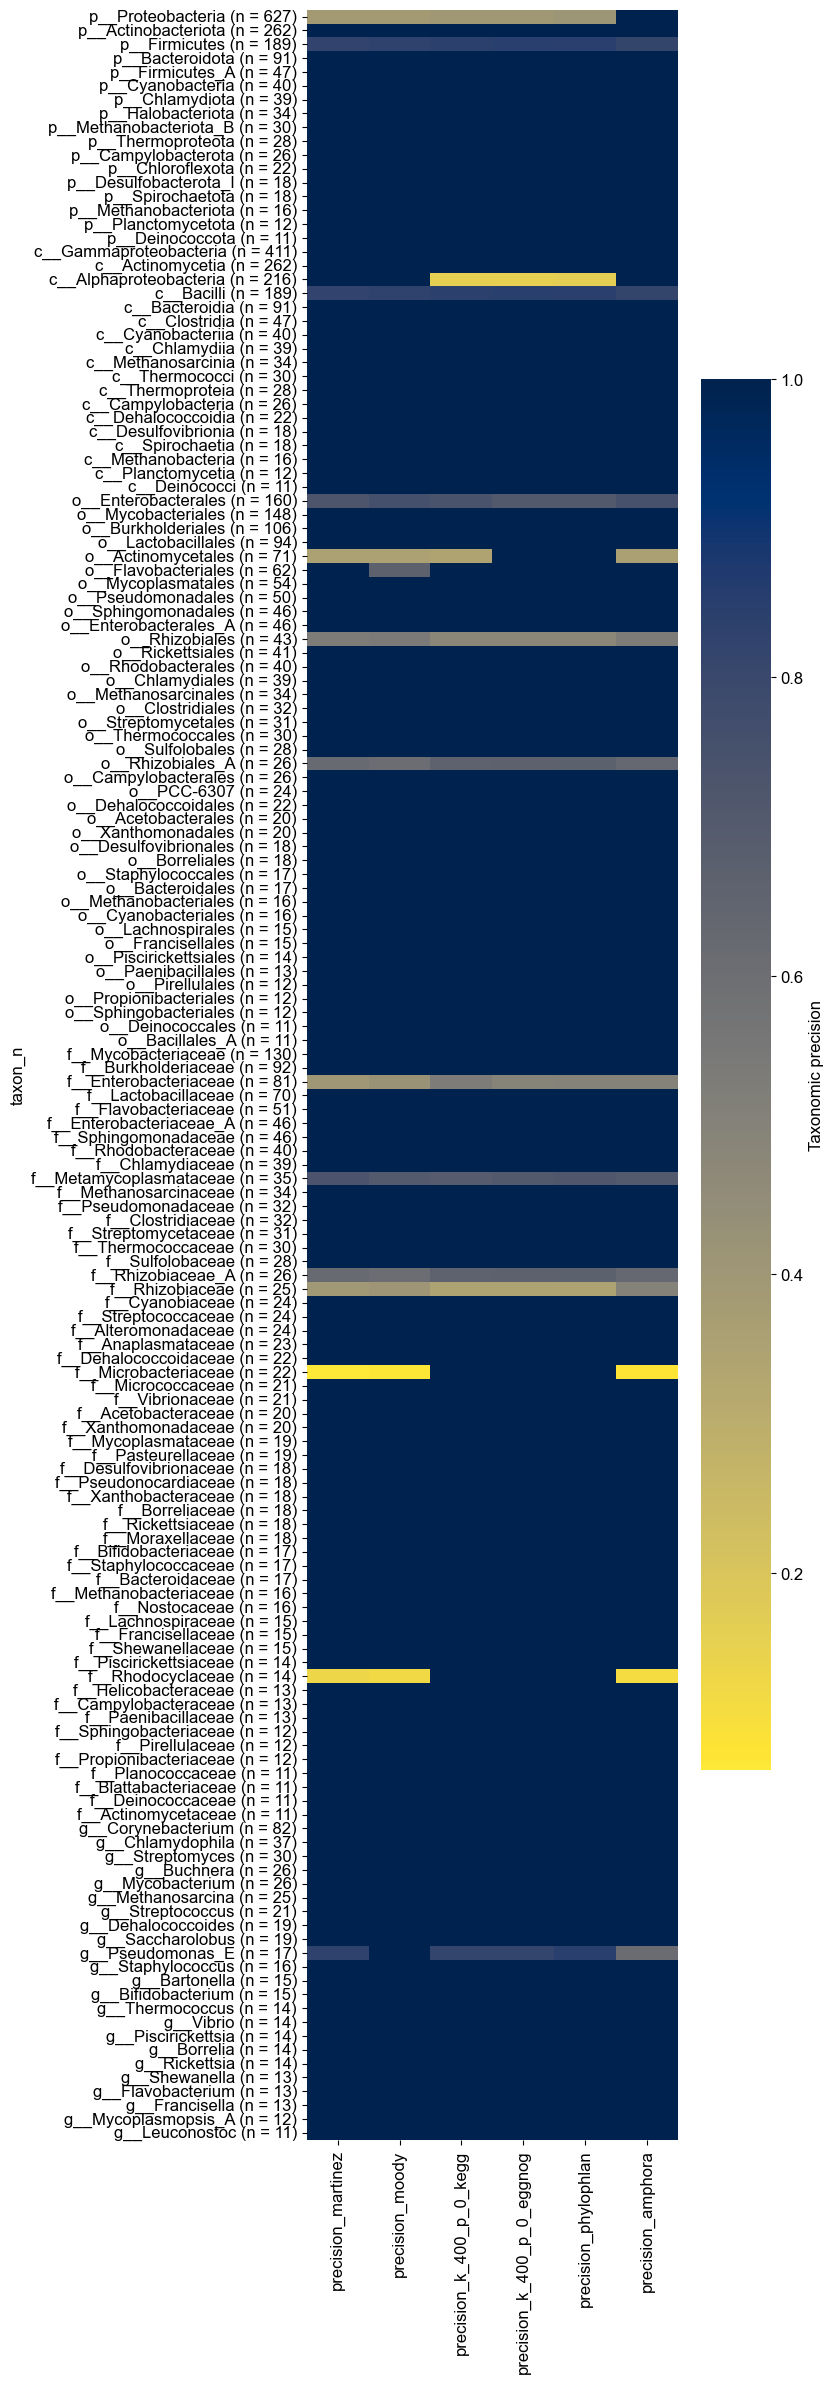

In [50]:
plt.figure(figsize = (8.5, 24))
sns.heatmap(df_plot, cbar_kws = {'label' : 'Taxonomic precision'},
           yticklabels = True, cmap = 'cividis_r')
# plt.tick_params(top = True, right = True, direction = 'in', which = 'both')
plt.savefig(f'./figures/figure_S3C_precision.svg')
plt.show()

In [51]:
columns = ['taxon_n', 'recall_martinez', 'recall_moody', 'recall_k_400_p_0_kegg', 'recall_k_400_p_0_eggnog',
           'recall_phylophlan', 'recall_amphora']

In [52]:
df_plot = df_taxa[columns]
df_plot.set_index('taxon_n', inplace = True)

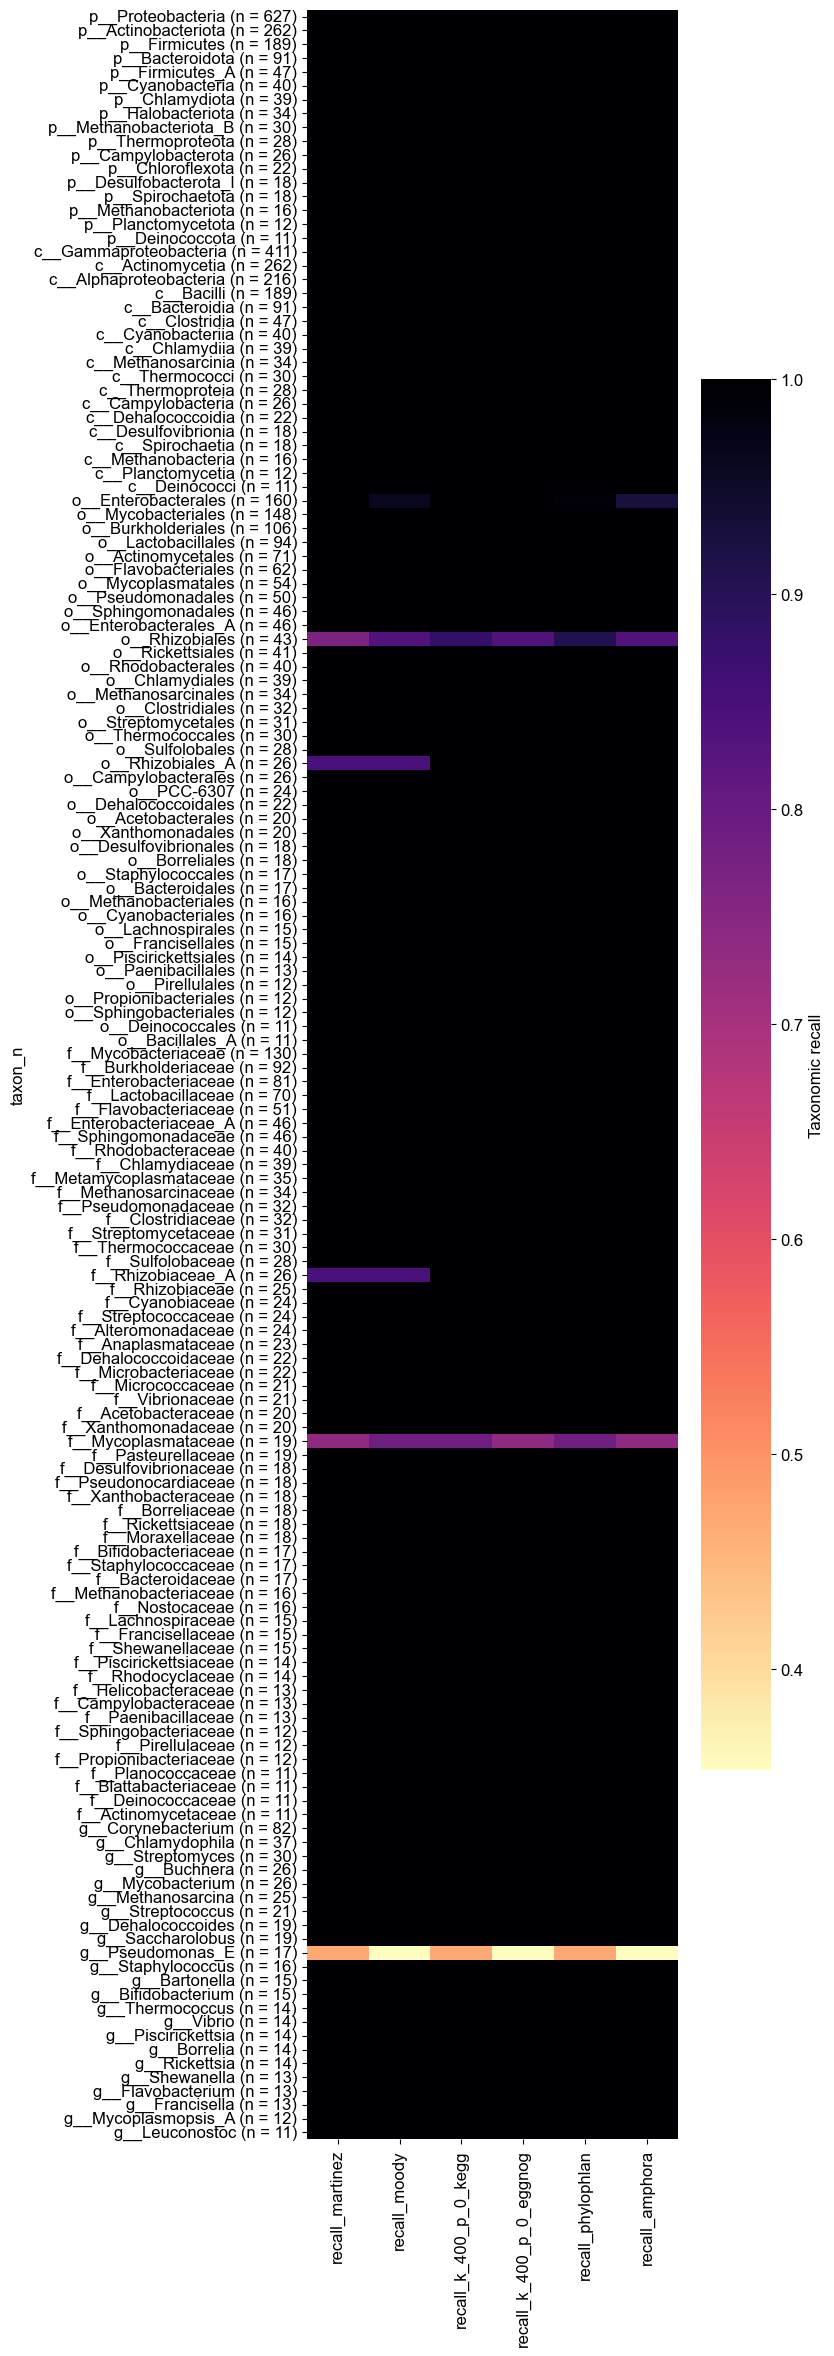

In [53]:
plt.figure(figsize = (8.5, 23.73))
sns.heatmap(df_plot, cbar_kws = {'label' : 'Taxonomic recall'},
           yticklabels = True, cmap = 'magma_r')
# plt.tick_params(top = True, right = True, direction = 'in', which = 'both')
plt.savefig(f'./figures/figure_S3C_recall.svg')
plt.show()